## Чупарин Егор 17-АС

### Лабораторная работа № 3. Регрессионный анализ данных - Вариант 22

#### Цель лабораторной работы – получение навыков работы с методами регрессии.

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.


Кодировка классификаторов:
1. линейная регрессия без использования регуляризаторов;
2. линейная регрессия, LASSO регуляризатор;
3. линейная регрессия, RIDGE регуляризатор;


### 1. Изучение набора данных

airfoil_self_noise.dat.txt
Attribute Information: (информация об атрибутах)
This problem has the following inputs: (данная задача имеет следующий входные данные)

1. Frequency, in Hertzs. (частота, в Герцах)
2. Angle of attack, in degrees. (угол атаки в градусах)
3. Chord length, in meters. (длина хорды в метрах)
4. Free-stream velocity, in m eters per second. (скорость набегающего потока в метрах в секунду)
5. Suction side displacement thickness, in meters. (толщина смещения стороны всасывания, в метрах) 
The only output is: (единственные выходные данные)
7. Scaled sound pre ssure level, in decibels. (масштабированный уровень звукового давления в децибелах)

In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr

sns.set(style="darkgrid")
plt.style.use('ggplot')  # Красивые графики

In [57]:
df = pd.read_csv('airfoil_self_noise.dat.txt', sep='\s+', names=["frequency",
                                                        "angle",
                                                        "chord",
                                                        "velocity",
                                                        "thickness",
                                                        "sound",
]) # загрузил данные в объект df_air
df_air = pd.DataFrame(df)
df_air.head()

,frequency,angle,chord,velocity,thickness,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### 2. Удаление дубликатов строк в наборе данных

In [58]:
print("Размер набора данных до удаления: " , df_air.count().max())
if df_air.count().max() == df_air.drop_duplicates(keep='first').count().max():
    print("Дубликатов нет")
else:
    df_air.drop_duplicates(keep='first', inplace = True)  #  Удаление дубликатов, кроме первого вхождения; удаление в данной таблице
    print("Размер набора данных до удаления: ", df_air.count().max())
df_air.shape

Размер набора данных до удаления:  1503
Дубликатов нет


(1503, 6)

### 3. Масштабирование количественных признаков

In [59]:
# выделим категориальные и числовые признаки
numerical_columns = [i for i in df_air.columns if df_air[i].dtype.name != 'object']
categorial_columns = [i for i in df_air.columns if df_air[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['frequency', 'angle', 'chord', 'velocity', 'thickness', 'sound']
categorial:  []


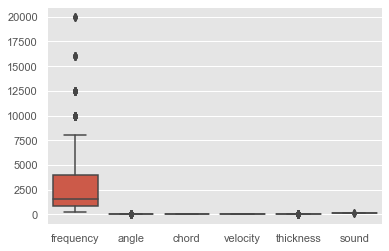

In [40]:
sns.boxplot(data=df_air[numerical_columns]) # до масштабирования

In [60]:
df_air

,frequency,angle,chord,velocity,thickness,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


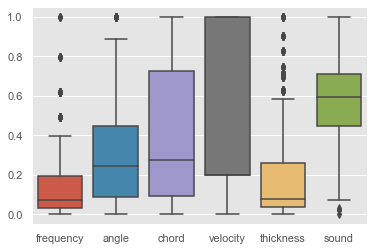

In [42]:
scaler = preprocessing.MinMaxScaler()

df_air[numerical_columns] = scaler.fit_transform(df_air[numerical_columns].values.astype(float))
sns.boxplot(data=df_air[numerical_columns]) # после масштабирования

In [61]:
df_air

,frequency,angle,chord,velocity,thickness,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


### 4. Замена категориальных признаков

Категориальных признаков нет

### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

           frequency     angle     chord  velocity  thickness     sound
frequency   1.000000 -0.272765 -0.003661  0.133664  -0.230107 -0.390711
angle      -0.272765  1.000000 -0.504868  0.058760   0.753394 -0.156108
chord      -0.003661 -0.504868  1.000000  0.003787  -0.220842 -0.236162
velocity    0.133664  0.058760  0.003787  1.000000  -0.003974  0.125103
thickness  -0.230107  0.753394 -0.220842 -0.003974   1.000000 -0.312670
sound      -0.390711 -0.156108 -0.236162  0.125103  -0.312670  1.000000


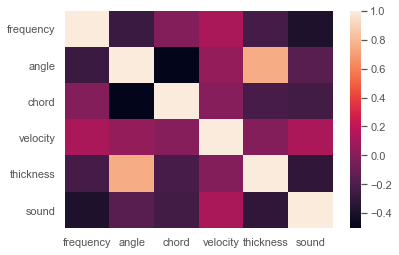

In [62]:
corr_matrix = df_air.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

Можно сделать вывод: Признаки коррелируют равномерно

### 6. Заполните пропущенные значения в данных

##### Пропущенные значения отсутствуют

### 7. Решить поставленную задачу регресси с в соответствии с заданием

In [83]:
x, y = df_air.drop(['sound'], axis=1), df_air['sound']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

lasso = Lasso()

params = {'alpha': np.arange(0.005, 5, 0.05)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(x_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha
print('Лучшее значение Альфа:', best_alpha)

Лучшее значение Альфа: 0.005


In [84]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(x_train,y_train)
pred_las = lasso.predict(x_test)
P, p_value_P = pearsonr(pred_las, y_test)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(pred_las, y_test)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_las[:15] - y_test[:15])

Коррелция по Пирсону:  0.7182740686391548
Корреляция по Спирмену:  0.7056934268757982
P_VALUSE_P : 9.610803331740981e-73
P_VALUSE_S : 3.4147127657157415e-69
61      1.252097
1025   -7.427139
1333   -2.059964
817     3.969963
725     6.237026
569    -0.224930
1019    7.330559
1023   -6.913290
256     4.179708
1079   -2.660242
1401   -1.997841
28      0.006438
712     3.266592
981    -8.466430
196     3.295800
Name: sound, dtype: float64


In [85]:
reg = Ridge()
params = {'alpha': np.arange(-6, 5, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(x_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('Лучшее значение альфа:', best_alpha)

Лучшее значение альфа: -2.1316282072803006e-14


In [86]:
reg = Ridge(alpha=best_alpha)
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)
P, p_value_P = pearsonr(pred_reg, y_test)
print("Корреляция по Пирсону: ", P)
S, p_value_S = spearmanr(pred_reg, y_test)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_reg[:15] - y_test[:15])

Корреляция по Пирсону:  0.7206931879410348
Корреляция по Спирмену:  0.6909281992537074
P_VALUSE_P : 1.8952359684391237e-73
P_VALUSE_S : 2.9344422313425506e-65
61      1.249228
1025   -7.147322
1333   -1.874832
817     4.433006
725     5.878581
569     0.109073
1019    7.613544
1023   -6.631889
256     4.182795
1079   -2.013335
1401   -1.821842
28     -0.066991
712     0.755373
981    -8.780542
196     3.095139
Name: sound, dtype: float64
